In [1]:
# importing libraries 
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset 
df = pd.read_csv(r"D:\Studies\DataScience\DataTrained\DataTrained_Classes\FlipRobo\FlipRobo2\ProjectEvaluation\Phase1\WA_Fn-UseC_-HR-Employee-Attrition.csv")


In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

No Null Values 

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [9]:
df1=df.dropna()

In [10]:
print(df1.shape)
print(df.shape)

(1470, 35)
(1470, 35)


In [11]:
# dropping unwanted columns
df2=df1.drop(columns=['EmployeeCount', 'StandardHours','EmployeeNumber','Over18'], axis=1)

print(df2.shape),print(df1.shape),print(df.shape)

(1470, 31)
(1470, 35)
(1470, 35)


(None, None, None)

In [12]:
df2.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [13]:
df['Age'].describe(include='all')

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

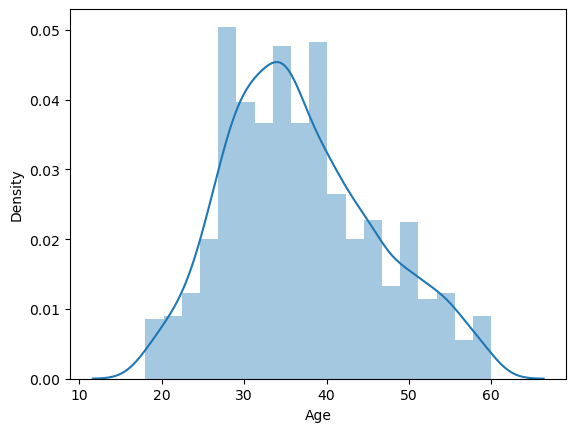

In [14]:
plt.plot()
sns.distplot(df['Age']) #distrubution plot to check the skewness 
plt.show()


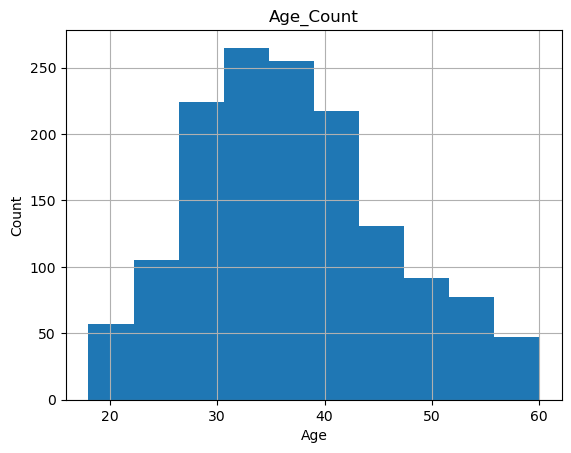

In [15]:
plt.plot()
df['Age'].hist(grid=True) #
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age_Count')
plt.show()

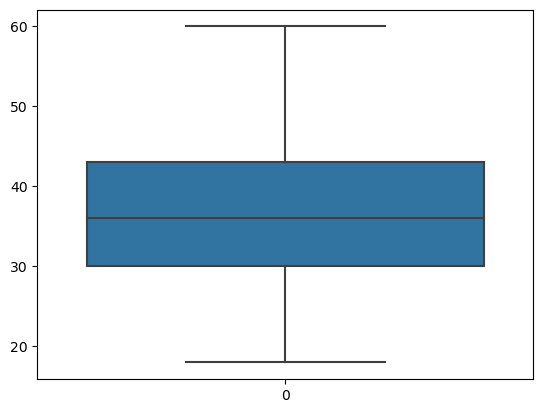

In [16]:
plt.plot()
sns.boxplot(df1['Age'])
plt.show()

<Axes: xlabel='Age', ylabel='count'>

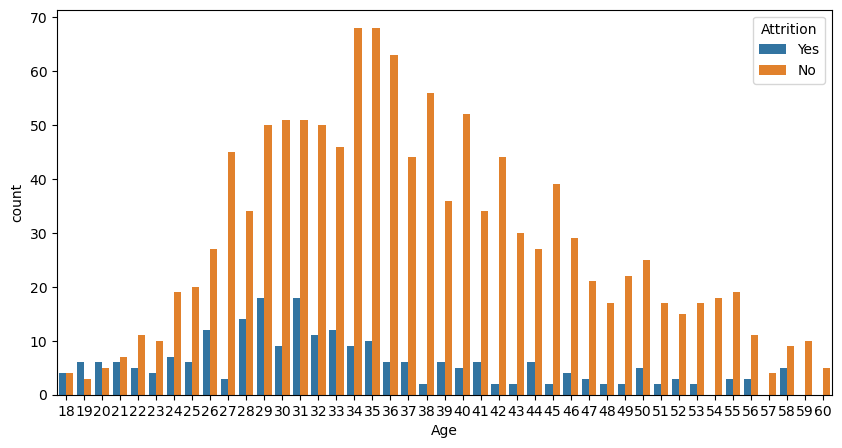

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Age", hue="Attrition",)

 - Data seems to be normally distributed 
 - Maximum number of people are between 30 to 40 age group 
 - Seems to be no outliers 
 - emp attrition is max in 26 to 33 age group

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2['Attrition']=le.fit_transform(df2['Attrition'])

In [19]:
df2['Attrition'].describe(include='all')

count    1470.000000
mean        0.161224
std         0.367863
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Attrition, dtype: float64

<Axes: xlabel='Attrition', ylabel='count'>

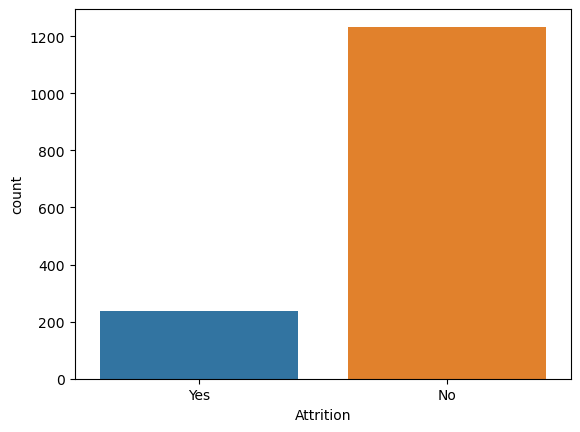

In [20]:
sns.countplot(data=df, x="Attrition" )

Imbalanced dataset  

In [21]:
le=LabelEncoder()
df2['BusinessTravel']=le.fit_transform(df2['BusinessTravel'])

In [22]:
df2['BusinessTravel'].describe(include='all')

count    1470.000000
mean        1.607483
std         0.665455
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: BusinessTravel, dtype: float64

<Axes: xlabel='BusinessTravel', ylabel='count'>

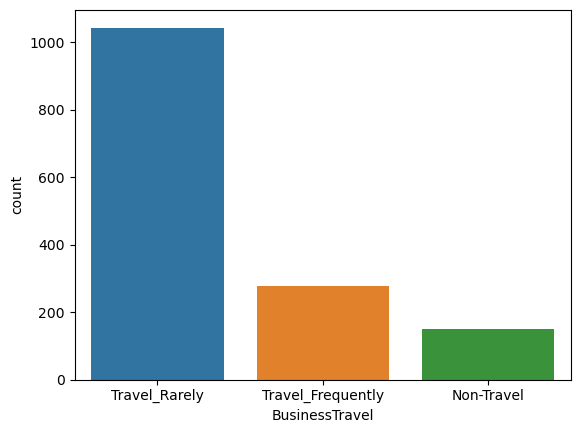

In [23]:
sns.countplot(data=df, x="BusinessTravel" )

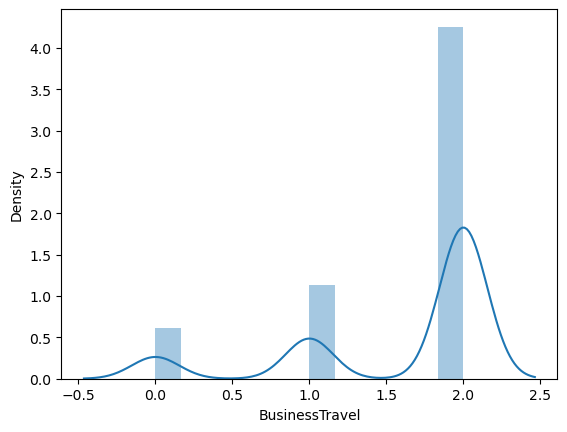

In [24]:
plt.plot()
sns.distplot(df2['BusinessTravel']) #distrubution plot to check the skewness 
plt.show()

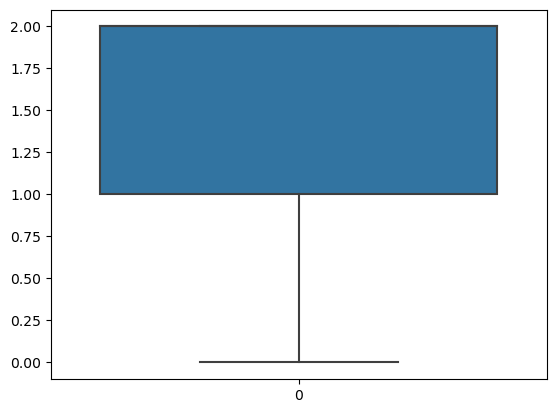

In [25]:
plt.plot()
sns.boxplot(df2['BusinessTravel'])
plt.show()

<Axes: xlabel='BusinessTravel', ylabel='count'>

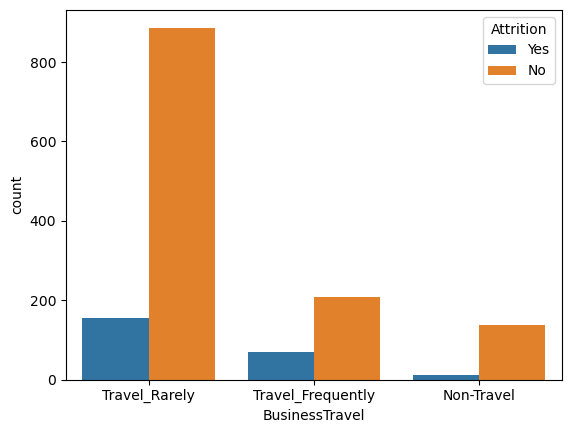

In [26]:
sns.countplot(data=df, x="BusinessTravel", hue="Attrition",)

<Axes: xlabel='BusinessTravel', ylabel='count'>

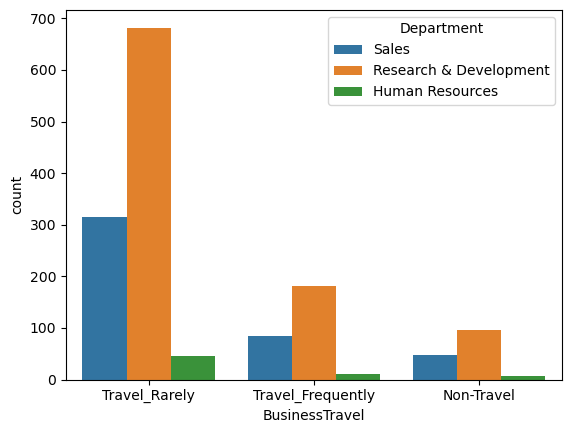

In [27]:
sns.countplot(data=df, x="BusinessTravel", hue="Department",)

In [28]:
df['DailyRate'].describe(include='all')

count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

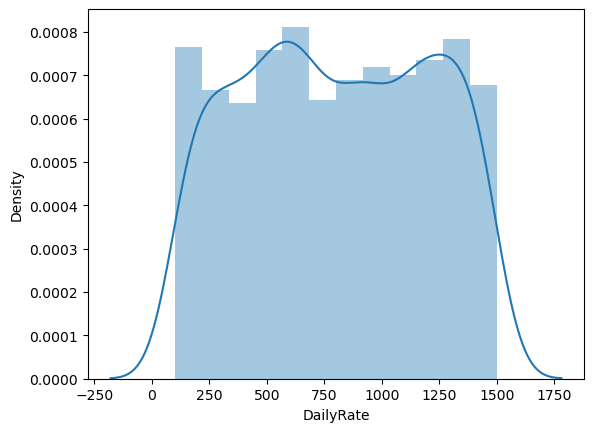

In [29]:
plt.plot()
sns.distplot(df['DailyRate']) #distrubution plot to check the skewness 
plt.show()


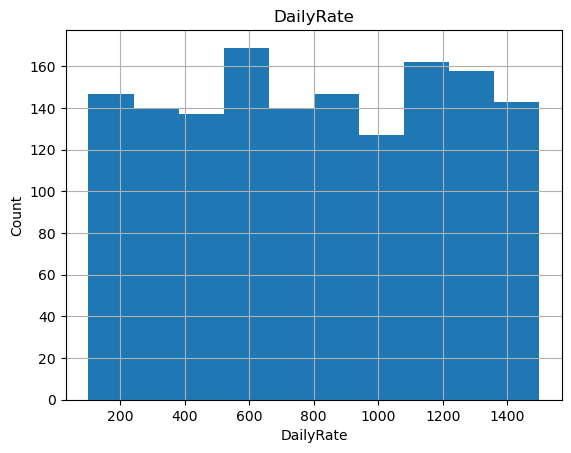

In [30]:
plt.plot()
df['DailyRate'].hist(grid=True) #
plt.xlabel('DailyRate')
plt.ylabel('Count')
plt.title('DailyRate')
plt.show()

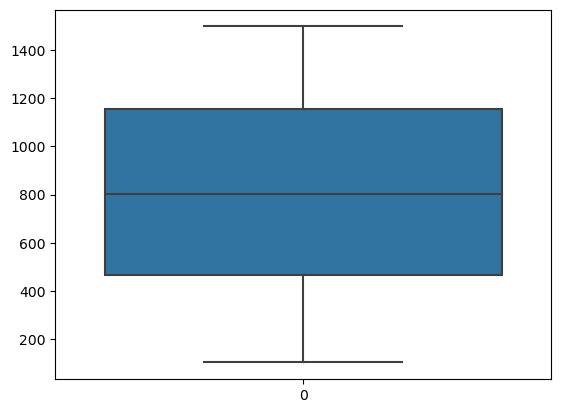

In [31]:
plt.plot()
sns.boxplot(df1['DailyRate'])
plt.show()

In [32]:
le=LabelEncoder()
df2['Department']=le.fit_transform(df2['Department'])

In [33]:
df['Department'].describe(include='all')

count                       1470
unique                         3
top       Research & Development
freq                         961
Name: Department, dtype: object

<Axes: xlabel='Department', ylabel='count'>

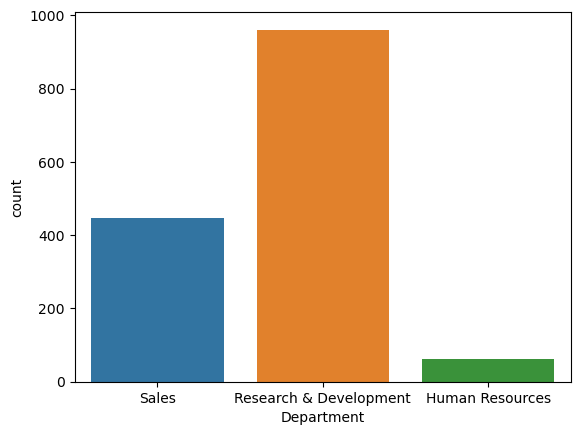

In [34]:
sns.countplot(data=df, x="Department", )

<Axes: xlabel='Department', ylabel='count'>

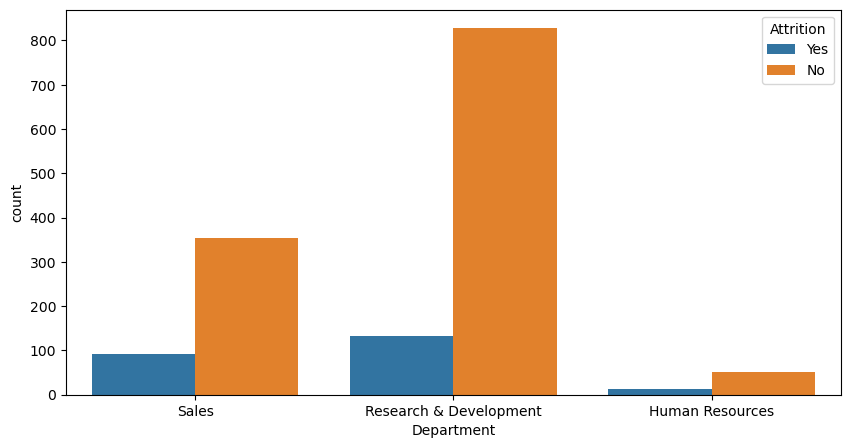

In [35]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Department", hue="Attrition",)

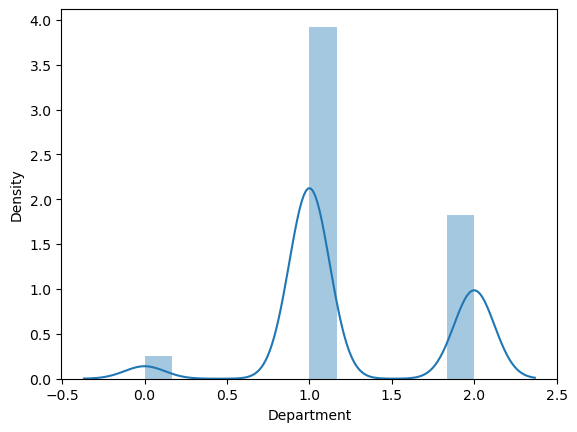

In [36]:
plt.plot()
sns.distplot(df2['Department']) #distrubution plot to check the skewness 
plt.show()

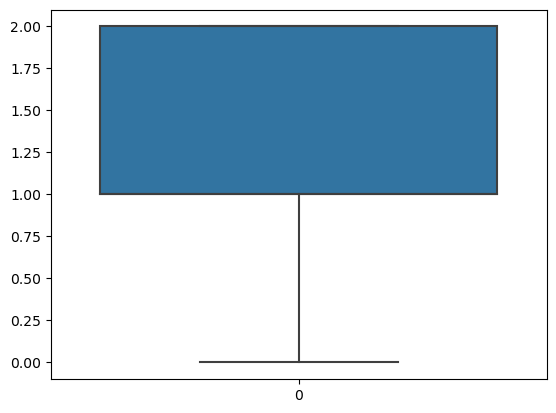

In [37]:
plt.plot()
sns.boxplot(df2['Department'])
plt.show()

In [38]:
df['DistanceFromHome'].describe(include='all')

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

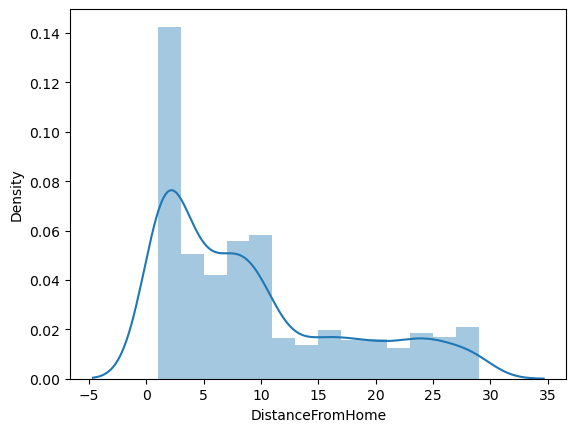

In [39]:
plt.plot()
sns.distplot(df['DistanceFromHome']) #distrubution plot to check the skewness 
plt.show()

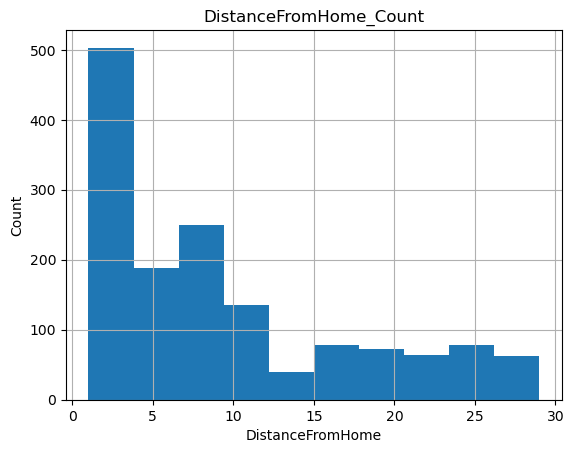

In [40]:
plt.plot()
df['DistanceFromHome'].hist(grid=True) #
plt.xlabel('DistanceFromHome')
plt.ylabel('Count')
plt.title('DistanceFromHome_Count')
plt.show()

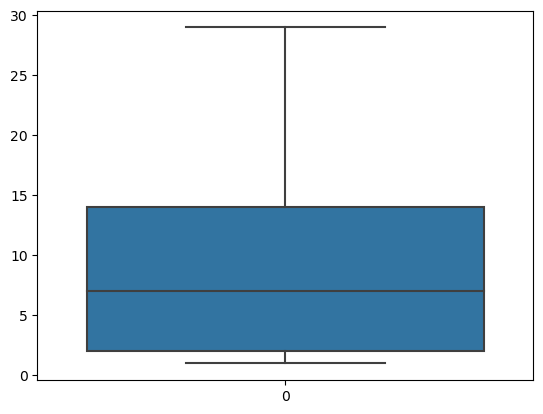

In [41]:
plt.plot()
sns.boxplot(df1['DistanceFromHome'])
plt.show()

In [42]:
df['Education'].describe(include='all')

count    1470.000000
mean        2.912925
std         1.024165
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64

<Axes: xlabel='Education', ylabel='count'>

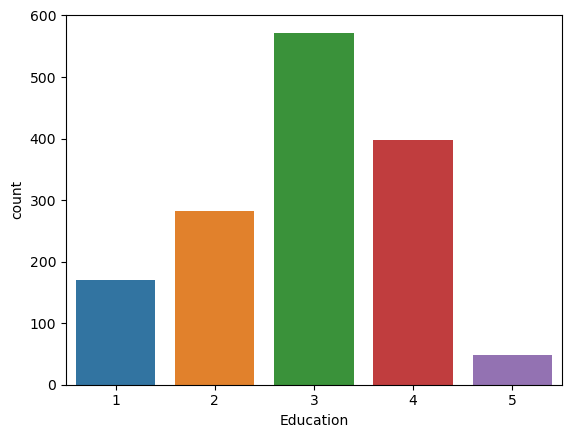

In [43]:
sns.countplot(data=df, x="Education", )

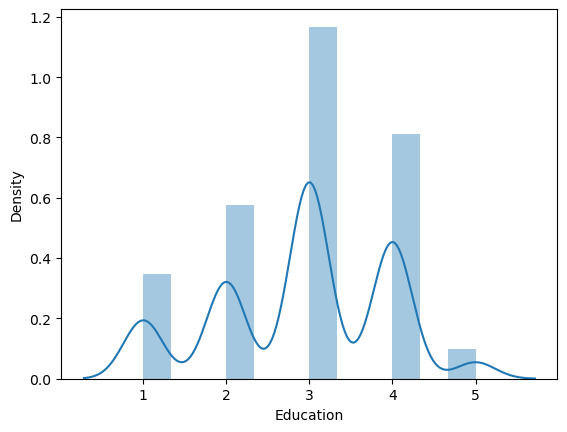

In [44]:
plt.plot()
sns.distplot(df['Education']) #distrubution plot to check the skewness 
plt.show()

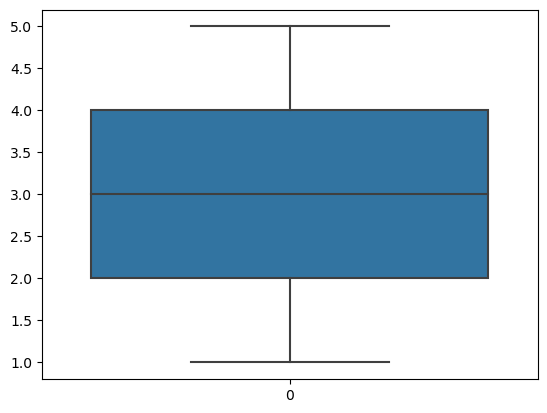

In [45]:
plt.plot()
sns.boxplot(df1['Education'])
plt.show()


<Axes: xlabel='Education', ylabel='count'>

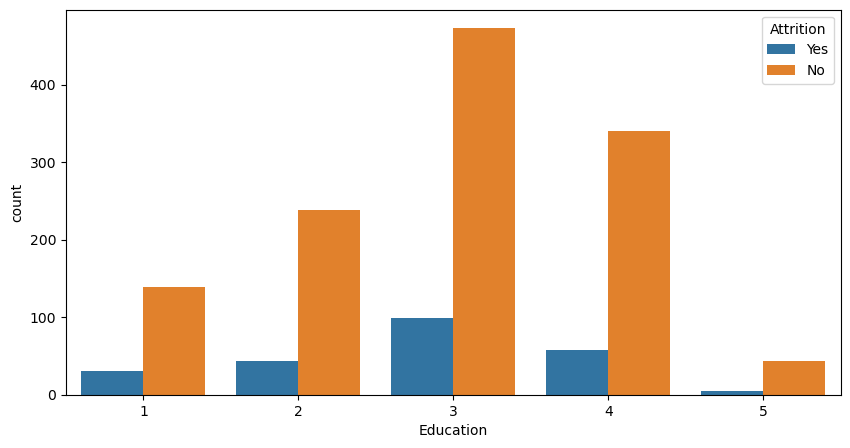

In [46]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Education", hue="Attrition",)

In [47]:
le=LabelEncoder()
df2['EducationField']=le.fit_transform(df2['EducationField'])

In [48]:
df['EducationField'].describe(include='all')

count              1470
unique                6
top       Life Sciences
freq                606
Name: EducationField, dtype: object

<Axes: xlabel='EducationField', ylabel='count'>

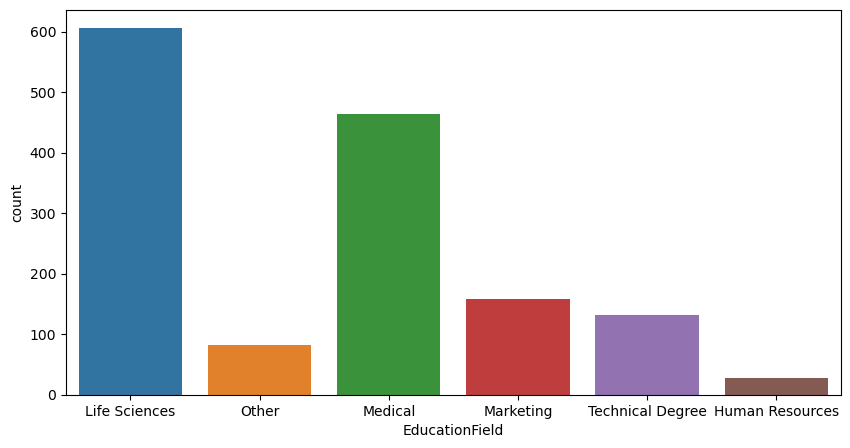

In [49]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="EducationField",)

In [50]:
df['EducationField'].describe(include='all')

count              1470
unique                6
top       Life Sciences
freq                606
Name: EducationField, dtype: object

<Axes: xlabel='EducationField', ylabel='count'>

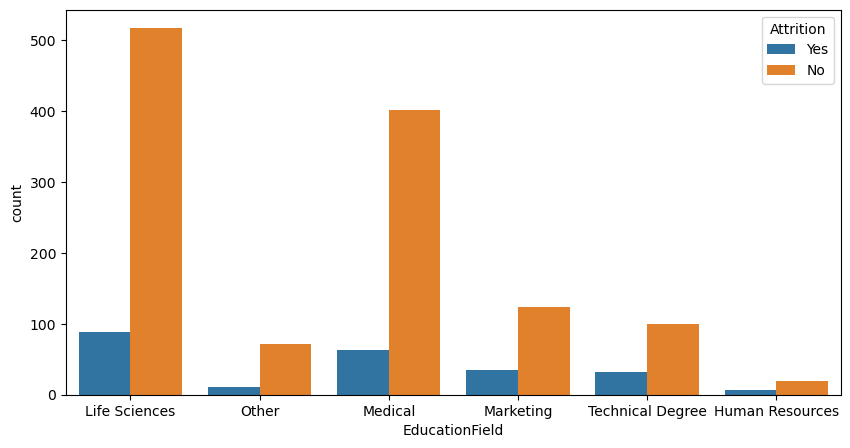

In [51]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="EducationField", hue="Attrition",)

In [52]:
df['EnvironmentSatisfaction'].describe(include='all')

count    1470.000000
mean        2.721769
std         1.093082
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64

<Axes: xlabel='EnvironmentSatisfaction', ylabel='count'>

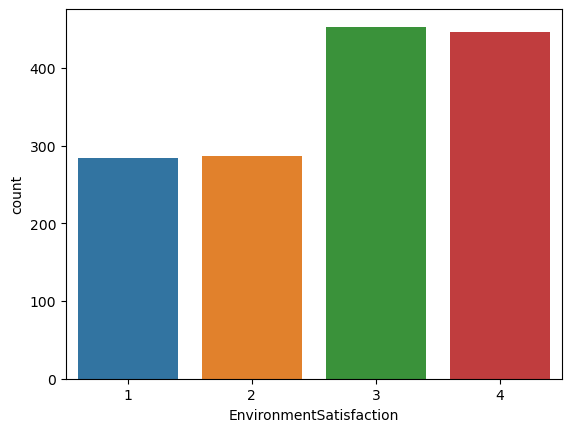

In [53]:
sns.countplot(data=df, x="EnvironmentSatisfaction", )

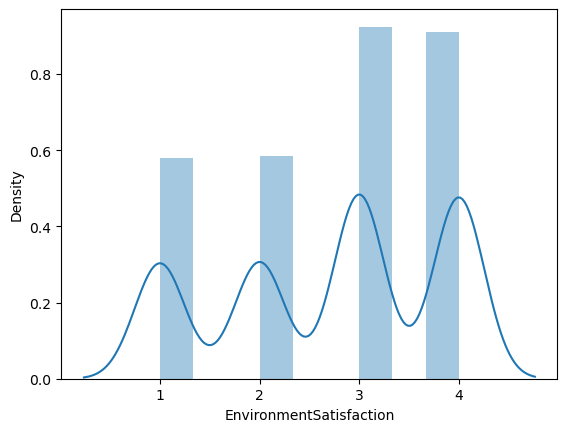

In [54]:
plt.plot()
sns.distplot(df['EnvironmentSatisfaction']) #distrubution plot to check the skewness 
plt.show()

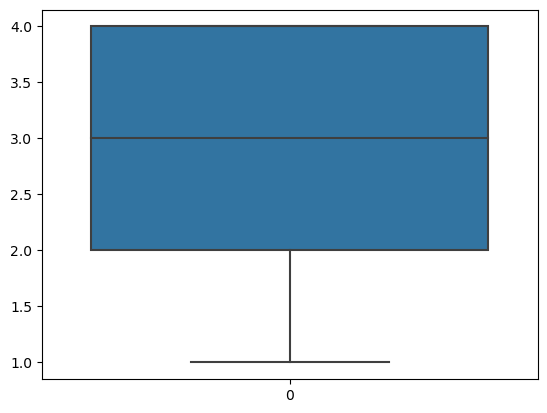

In [55]:
plt.plot()
sns.boxplot(df2['EnvironmentSatisfaction'])
plt.show()

<Axes: xlabel='EnvironmentSatisfaction', ylabel='count'>

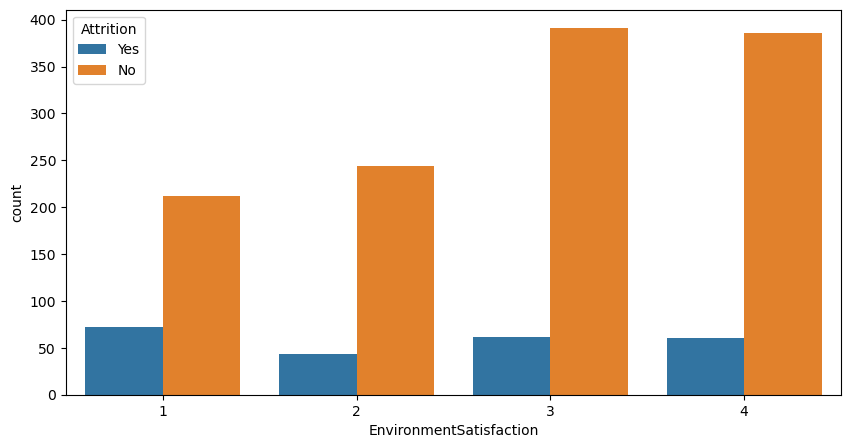

In [56]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="EnvironmentSatisfaction", hue="Attrition",)

In [57]:
df2['Gender'].replace(['Male','Female'],[0,1],inplace=True)

In [58]:
df['Gender'].describe(include='all')

count     1470
unique       2
top       Male
freq       882
Name: Gender, dtype: object

<Axes: xlabel='Gender', ylabel='count'>

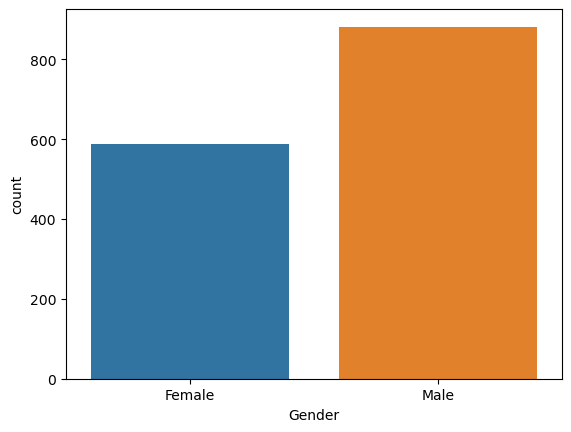

In [59]:
sns.countplot(data=df, x="Gender", )


<Axes: xlabel='Gender', ylabel='count'>

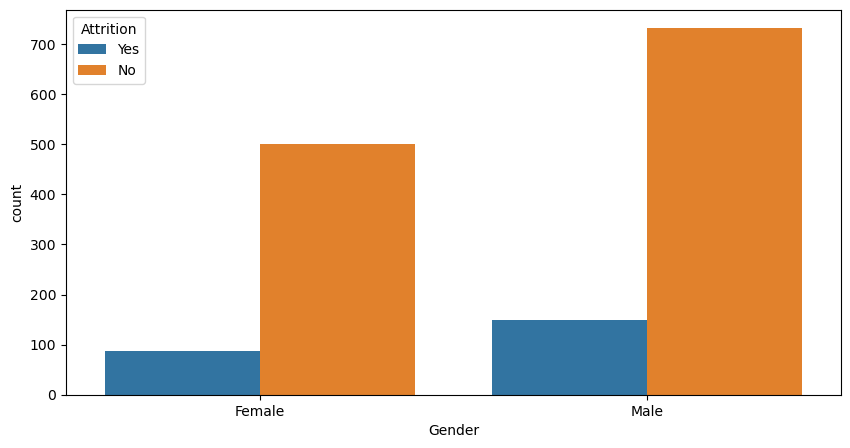

In [60]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Gender", hue="Attrition",)

In [61]:
df['HourlyRate'].describe(include='all')

count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64

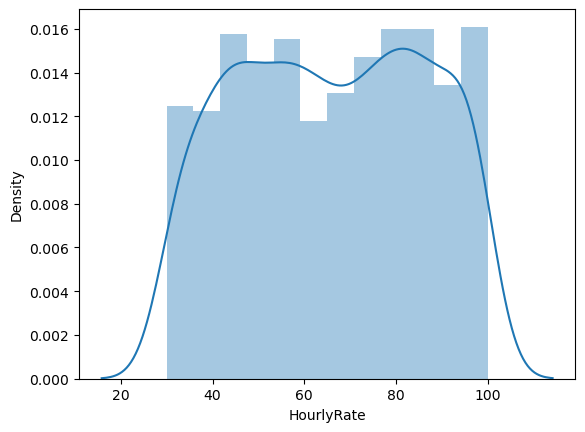

In [62]:
plt.plot()
sns.distplot(df['HourlyRate']) #distrubution plot to check the skewness 
plt.show()

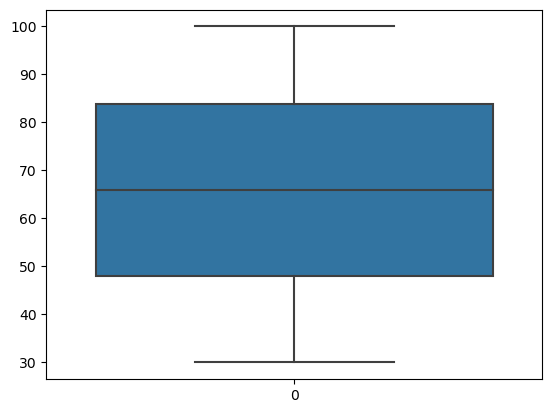

In [63]:
plt.plot()
sns.boxplot(df2['HourlyRate'])
plt.show()

In [64]:
df['JobInvolvement'].describe(include='all')

count    1470.000000
mean        2.729932
std         0.711561
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: JobInvolvement, dtype: float64

<Axes: xlabel='JobInvolvement', ylabel='count'>

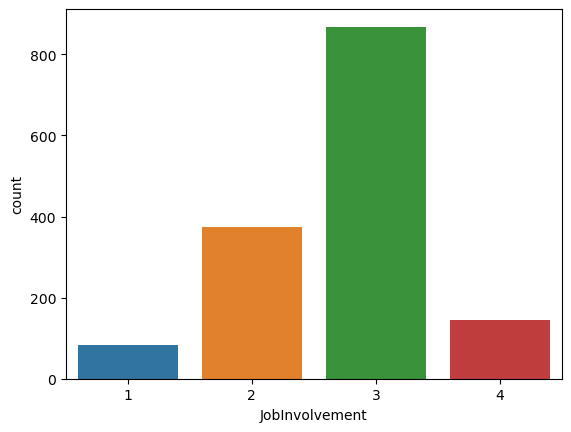

In [65]:
sns.countplot(data=df, x="JobInvolvement", )

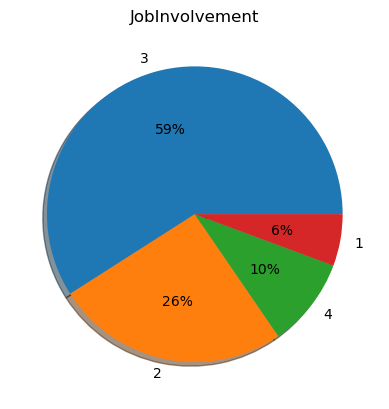

In [66]:
#pie chart
label=df['JobInvolvement'].unique()
y=df['JobInvolvement'].value_counts()
plt.title('JobInvolvement')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

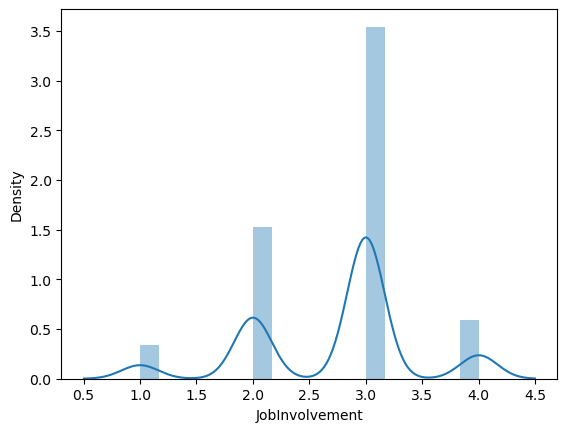

In [67]:
plt.plot()
sns.distplot(df['JobInvolvement']) #distrubution plot to check the skewness 
plt.show()

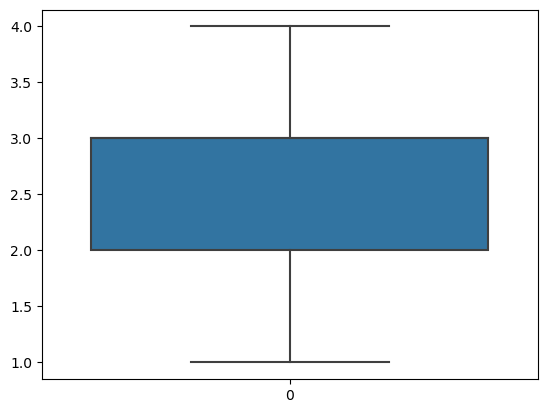

In [68]:
plt.plot()
sns.boxplot(df2['JobInvolvement'])
plt.show()

<Axes: xlabel='JobInvolvement', ylabel='count'>

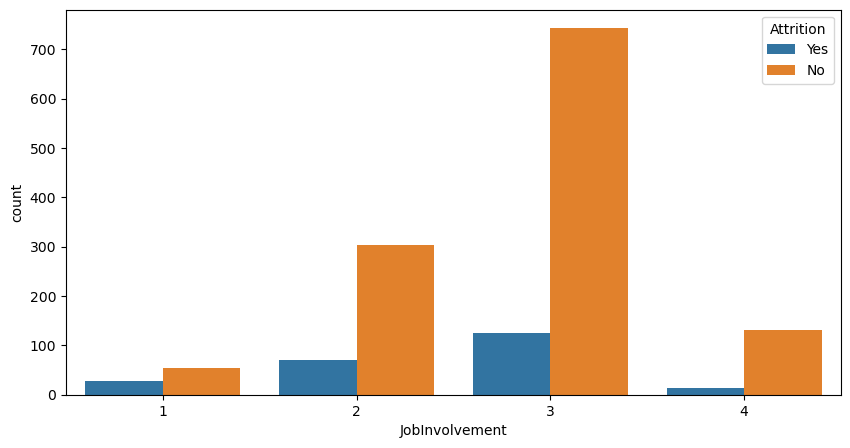

In [69]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="JobInvolvement", hue="Attrition",)

In [70]:
#checking unique
print(df['JobRole'].unique())
#count the unique values
print(df['JobRole'].value_counts())

['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


In [71]:
le=LabelEncoder()
df2['JobRole']=le.fit_transform(df2['JobRole'])


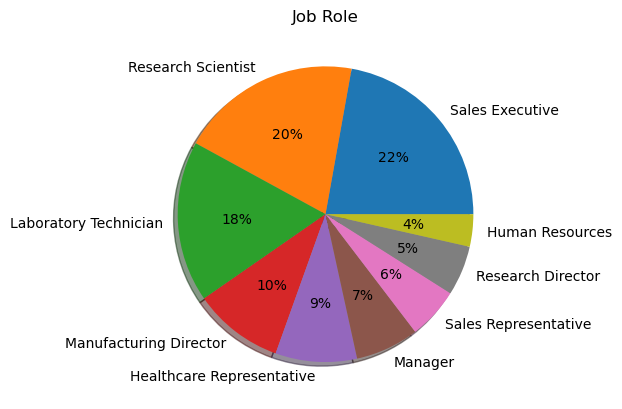

In [72]:
#pie chart
label=df['JobRole'].unique()
y=df['JobRole'].value_counts()


plt.title('Job Role')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

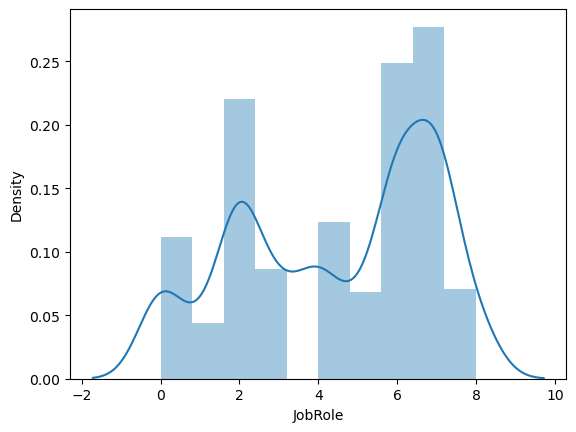

In [73]:
plt.plot()
sns.distplot(df2['JobRole']) #distrubution plot to check the skewness 
plt.show()


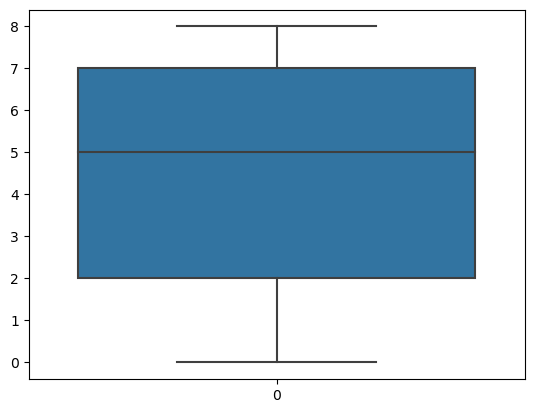

In [74]:
plt.plot()
sns.boxplot(df2['JobRole'])
plt.show()

<Axes: xlabel='JobRole', ylabel='count'>

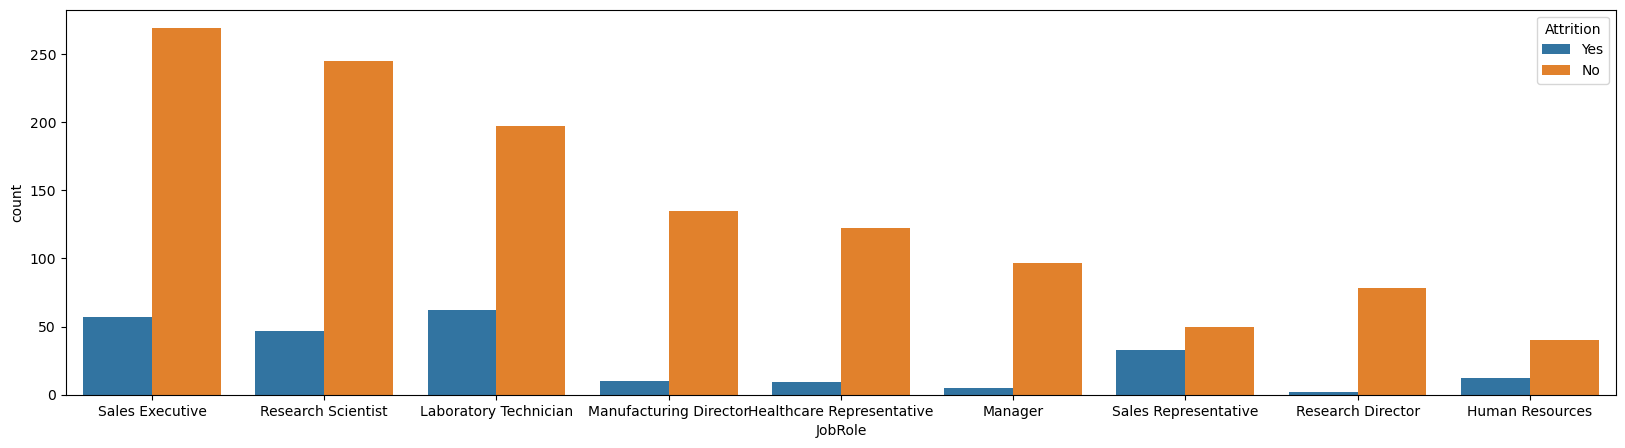

In [75]:
plt.figure(figsize=(20, 5))
sns.countplot(data=df, x="JobRole", hue="Attrition",)

In [76]:
df['JobSatisfaction'].describe(include='all')

count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

<Axes: xlabel='JobSatisfaction', ylabel='count'>

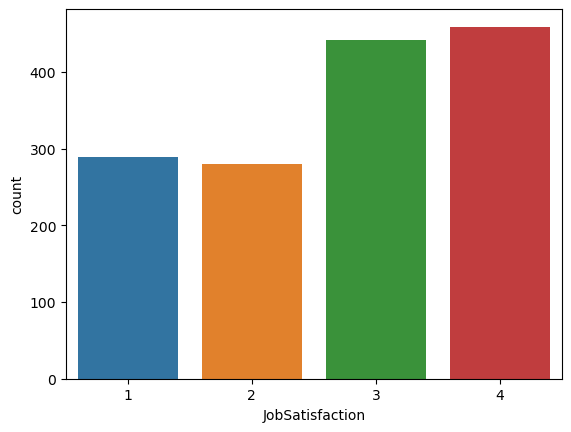

In [77]:
sns.countplot(data=df, x="JobSatisfaction", )

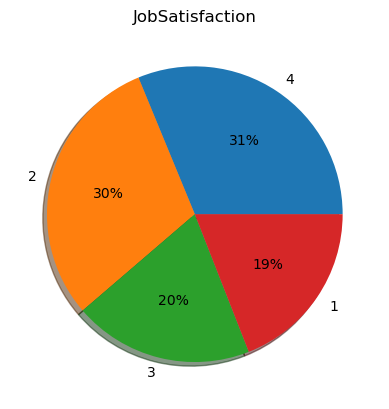

In [78]:
#pie chart
label=df['JobSatisfaction'].unique()
y=df['JobSatisfaction'].value_counts()


plt.title('JobSatisfaction')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

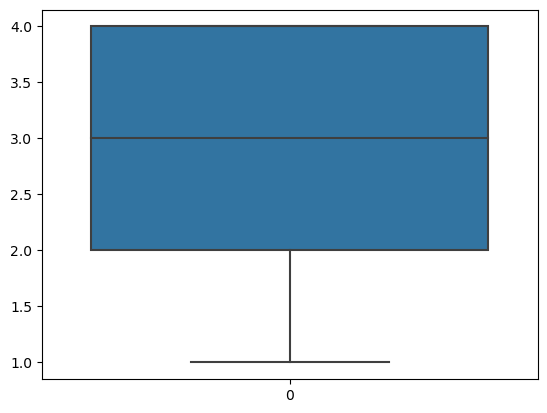

In [79]:
plt.plot()
sns.boxplot(df2['JobSatisfaction'])
plt.show()

<Axes: xlabel='JobSatisfaction', ylabel='count'>

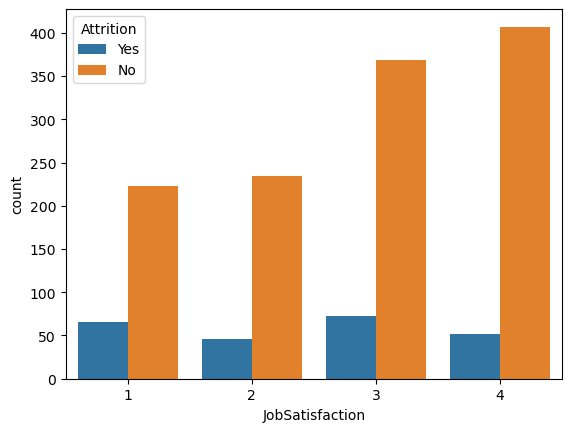

In [80]:
sns.countplot(data=df, x="JobSatisfaction", hue="Attrition",)

In [81]:
le=LabelEncoder()
df2['MaritalStatus']=le.fit_transform(df2['MaritalStatus'])

In [82]:
#checking unique
print(df['MaritalStatus'].unique())
#count the unique values
print(df['MaritalStatus'].value_counts())

['Single' 'Married' 'Divorced']
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


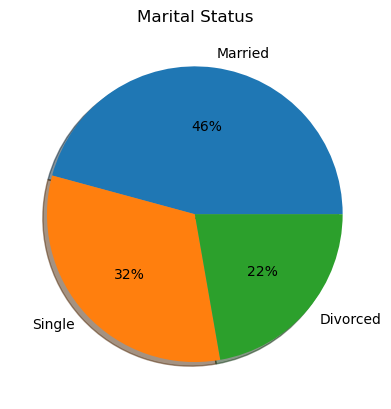

In [83]:
#pie chart
label=(['Married','Single','Divorced'])
y=df['MaritalStatus'].value_counts()

plt.title('Marital Status')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

<Axes: xlabel='MaritalStatus', ylabel='count'>

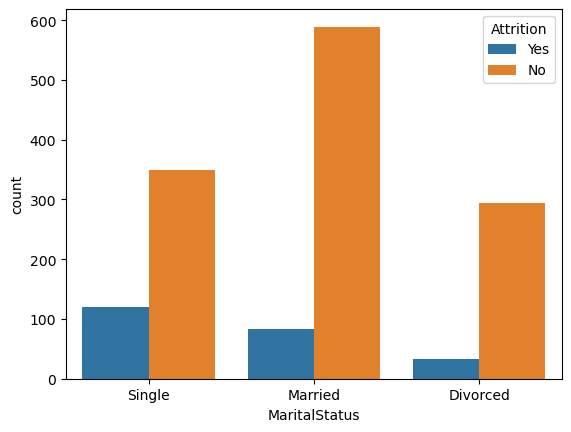

In [84]:
sns.countplot(data=df, x="MaritalStatus", hue="Attrition",)

In [85]:
df['MonthlyIncome'].describe(include='all')

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

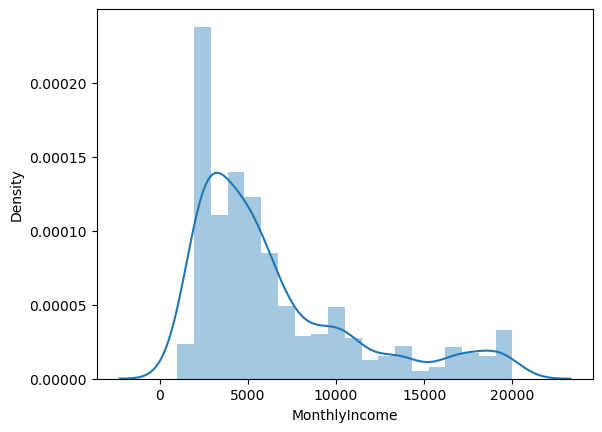

In [86]:
plt.plot()
sns.distplot(df['MonthlyIncome']) #distrubution plot to check the skewness 
plt.show()

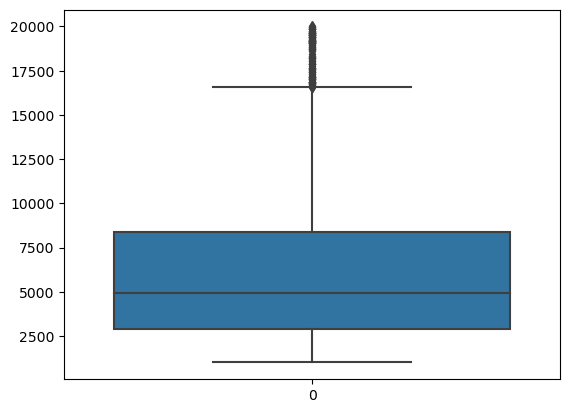

In [87]:
plt.plot()
sns.boxplot(df2['MonthlyIncome'])
plt.show()

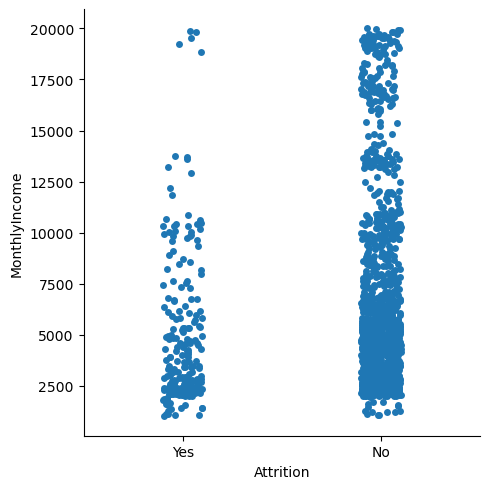

In [88]:
sns.catplot(x = 'Attrition', y = 'MonthlyIncome', data =df)
plt.show()

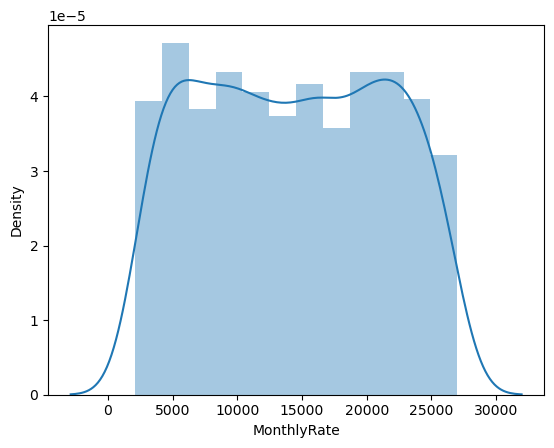

In [89]:
plt.plot()
sns.distplot(df['MonthlyRate']) #distrubution plot to check the skewness 
plt.show()

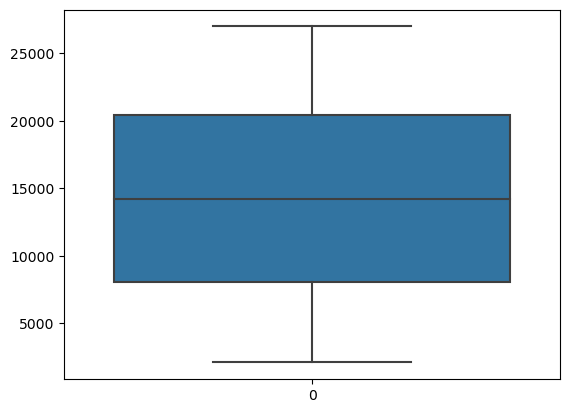

In [90]:
plt.plot()
sns.boxplot(df2['MonthlyRate'])
plt.show()

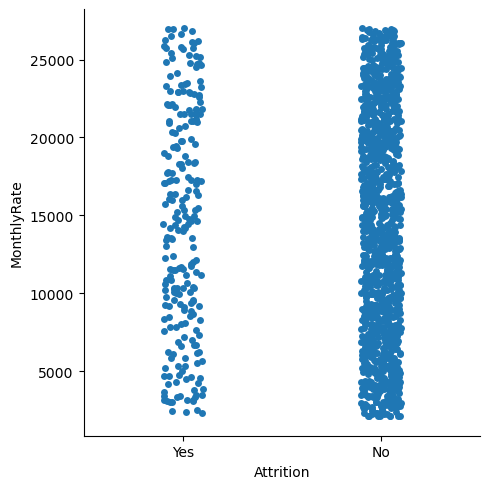

In [91]:
sns.catplot(x = 'Attrition', y = 'MonthlyRate', data =df)
plt.show()

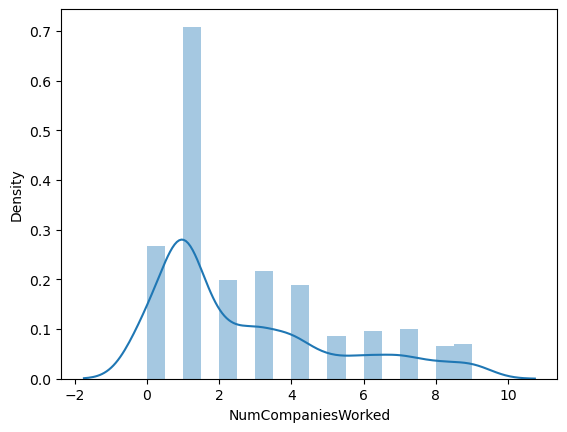

In [92]:
plt.plot()
sns.distplot(df['NumCompaniesWorked']) #distrubution plot to check the skewness 
plt.show()

<Axes: xlabel='NumCompaniesWorked', ylabel='count'>

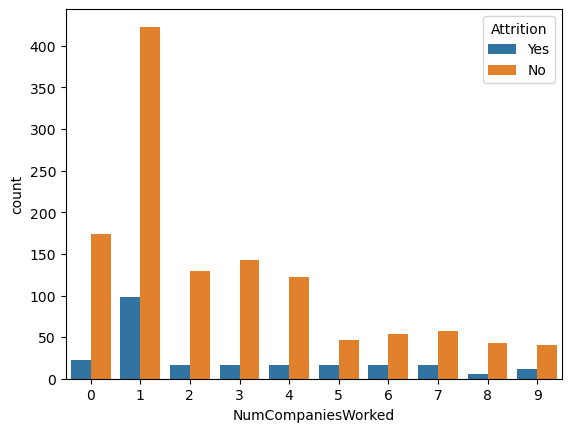

In [93]:
sns.countplot(data=df, x="NumCompaniesWorked", hue="Attrition",)

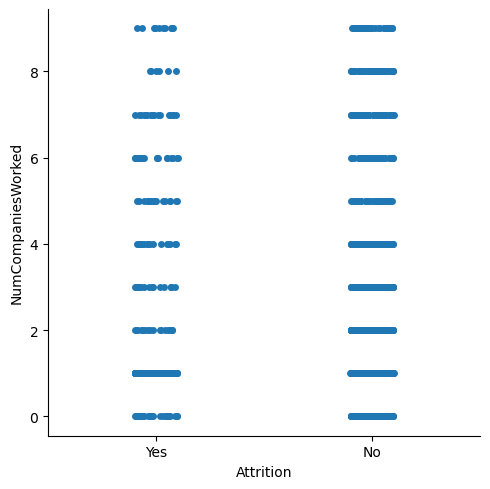

In [94]:
sns.catplot(x = 'Attrition', y = 'NumCompaniesWorked', data =df)
plt.show()

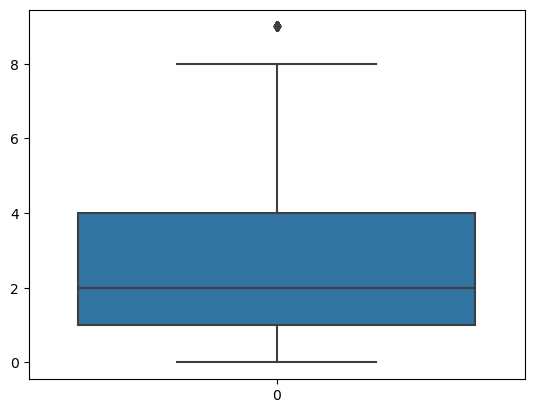

In [95]:
plt.plot()
sns.boxplot(df2['NumCompaniesWorked'])
plt.show()

In [96]:
le=LabelEncoder()
df2['OverTime']=le.fit_transform(df2['OverTime'])

In [97]:
df2['OverTime'].describe(include='all')

count    1470.000000
mean        0.282993
std         0.450606
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: OverTime, dtype: float64

<Axes: xlabel='OverTime', ylabel='count'>

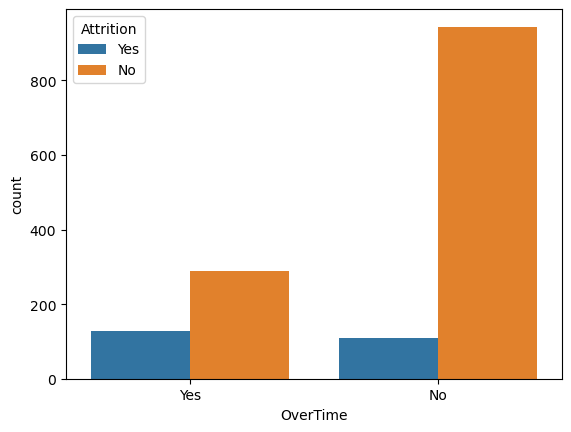

In [98]:
sns.countplot(data=df, x="OverTime", hue="Attrition",)

In [99]:
df2['PercentSalaryHike'].describe(include='all')

count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

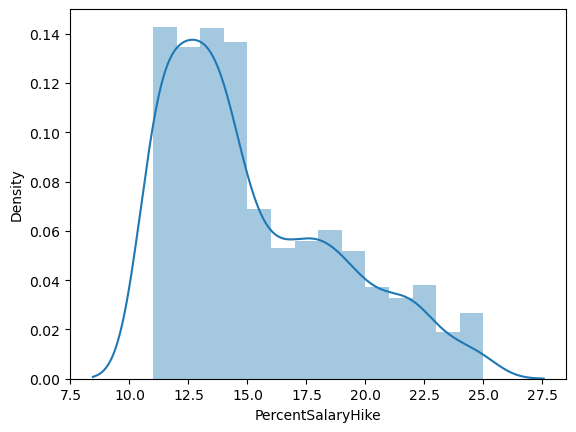

In [100]:
plt.plot()
sns.distplot(df['PercentSalaryHike']) #distrubution plot to check the skewness 
plt.show()

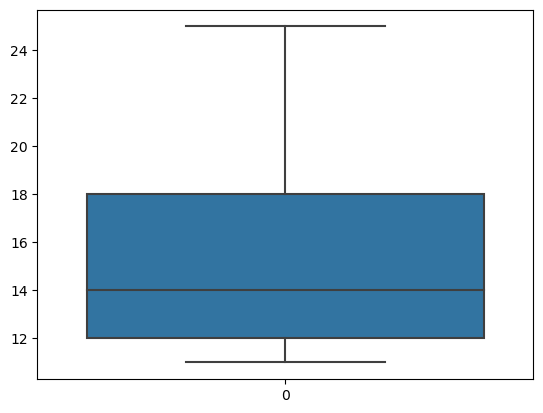

In [101]:
plt.plot()
sns.boxplot(df2['PercentSalaryHike'])
plt.show()

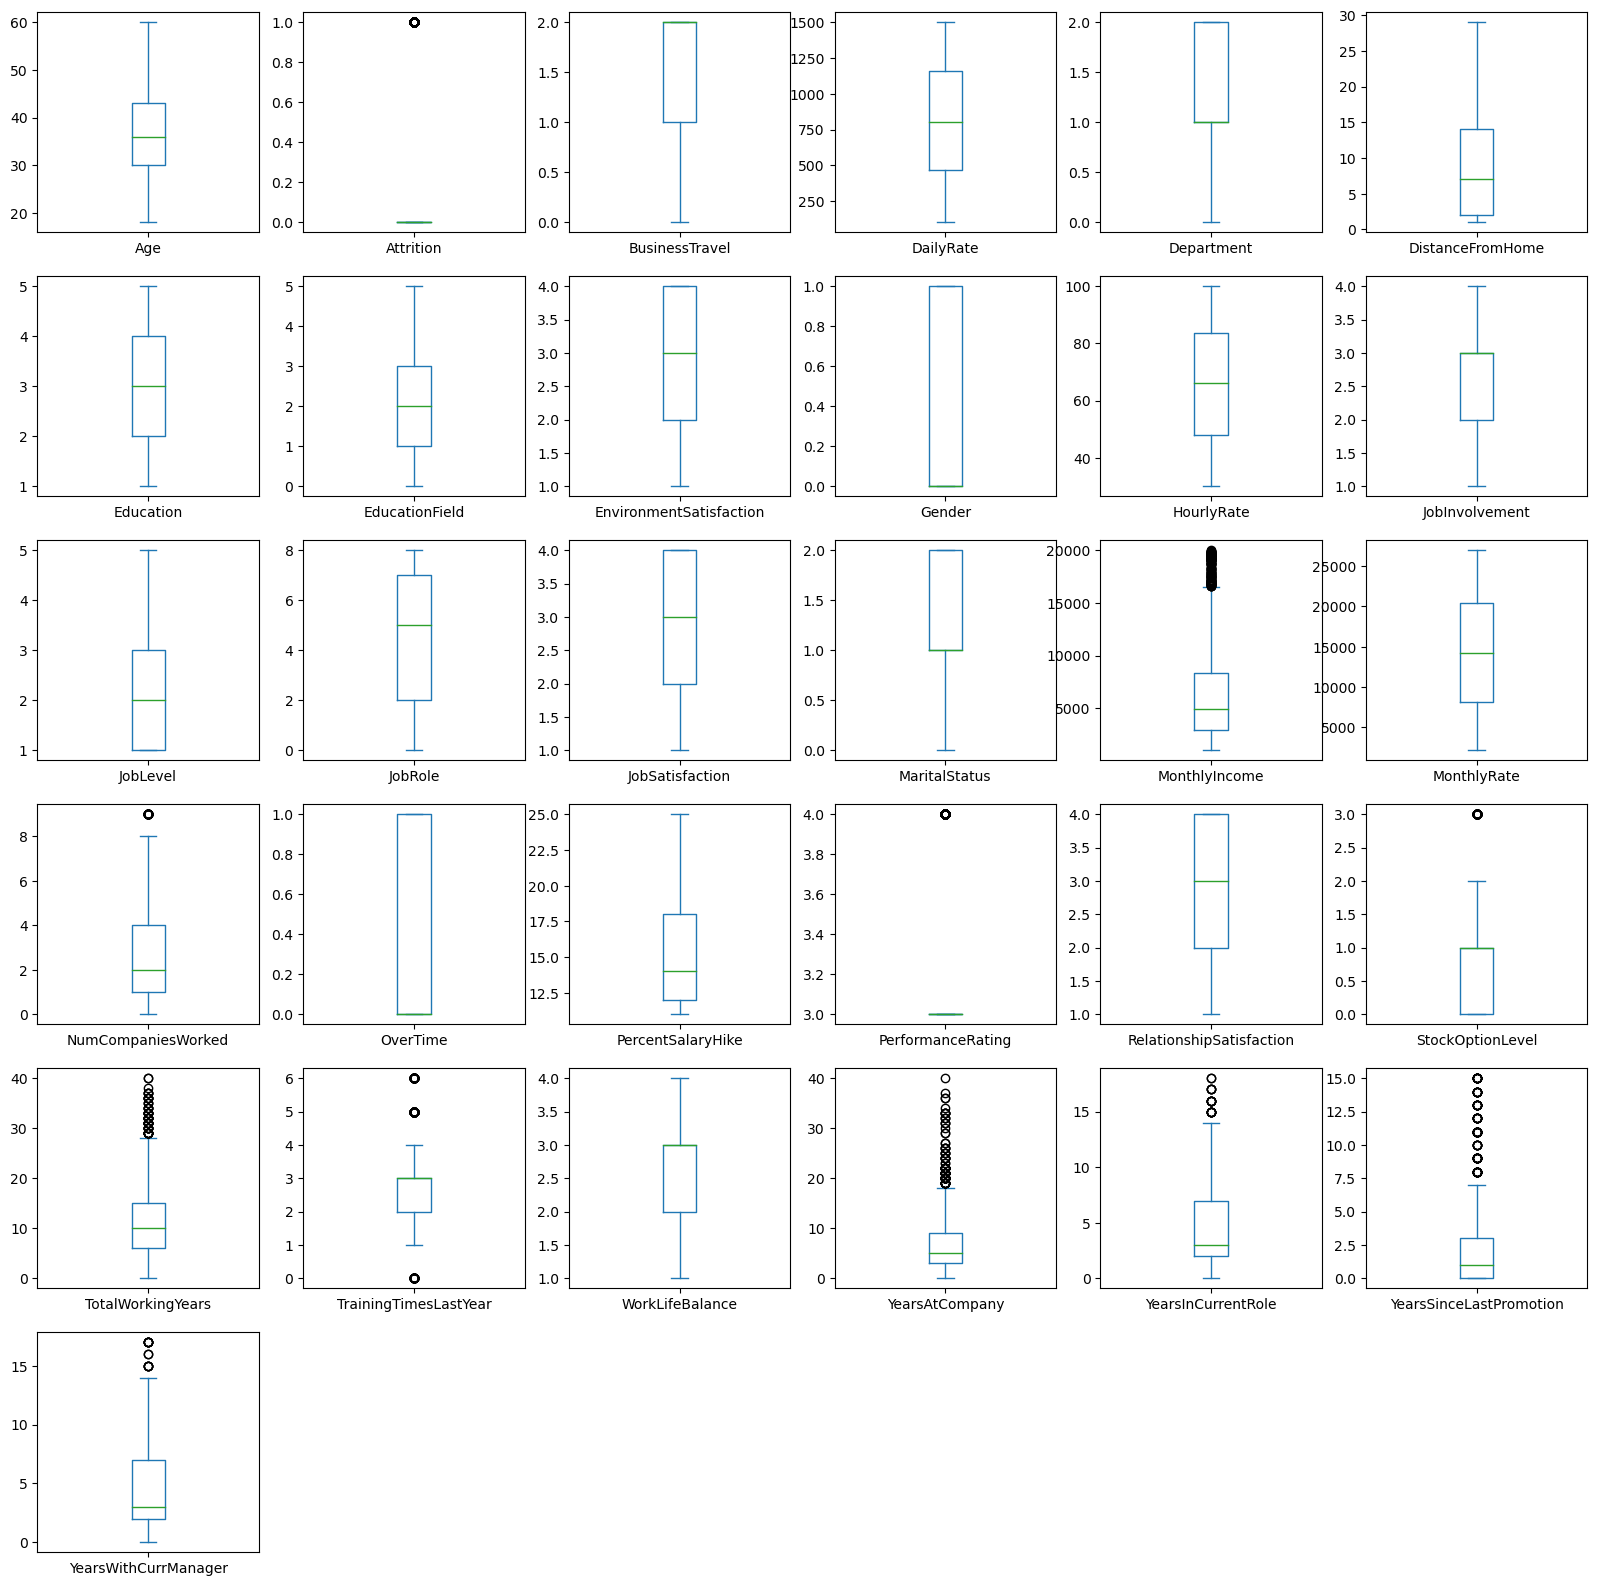

In [102]:
#Visualizing outliers 
df2.plot(kind='box',subplots=True,layout=(6,6),figsize=(20,20))
plt.show()

# removing Outliers 

In [103]:
# Spliting Variables
only_f=df2.drop('Attrition',axis=1)
lbl =df2['Attrition']

In [104]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [105]:
train_x,train_y=smt.fit_resample(only_f,lbl)

In [106]:
#after Applying SMOTE
train_y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

Now Data is balanced 

In [107]:
#make dataframe
df3=pd.DataFrame(train_x)

In [108]:
df3['Attrition']=train_y

In [109]:
df3.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,2,1,2,1,94,...,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,3,0,61,...,4,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,4,0,92,...,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,4,1,56,...,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,0,40,...,4,1,6,3,3,2,2,2,2,0


In [110]:
#checking shape of dataset
df3.shape

(2466, 31)

In [111]:
from scipy.stats import zscore
z=np.abs(zscore(df3))
threshold=3
df4=df3[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df3.shape[0]-df4.shape[0])/df3.shape[0])

percentage of loss of data by zscore is : 0.10097323600973236


In [112]:
#Independent variables
x=df4.drop('Attrition',axis=1)

In [113]:
#Dependent variables
y=df4['Attrition']

In [114]:
x.skew()

Age                         0.555795
BusinessTravel             -0.945839
DailyRate                   0.112619
Department                  0.158198
DistanceFromHome            0.773841
Education                  -0.158258
EducationField              0.642231
EnvironmentSatisfaction     0.005214
Gender                      0.965135
HourlyRate                  0.034517
JobInvolvement             -0.290243
JobLevel                    1.050492
JobRole                    -0.354271
JobSatisfaction             0.015109
MaritalStatus              -0.148683
MonthlyIncome               1.487519
MonthlyRate                 0.053607
NumCompaniesWorked          1.051221
OverTime                    1.015284
PercentSalaryHike           0.806198
PerformanceRating           2.682755
RelationshipSatisfaction   -0.040508
StockOptionLevel            0.989182
TotalWorkingYears           1.124880
TrainingTimesLastYear       0.545739
WorkLifeBalance            -0.428971
YearsAtCompany              1.393747
Y

In [115]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [116]:
scaler=MinMaxScaler(feature_range=(1,2))
power=PowerTransformer(method='box-cox')
pipeline=Pipeline(steps=[('s',scaler),('p',power)])

In [117]:
data=pipeline.fit_transform(x)

In [118]:
#make dataframe
x=pd.DataFrame(data,columns=x.columns)

In [119]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.816707,0.823095,0.883968,1.535606,-1.462601,-0.763660,-0.904414,-0.385609,1.592446,1.513665,...,-0.331912,-1.445100,-0.811810,0.093259,-2.442339,-1.924347,0.486655,0.556978,-0.944163,0.847233
1,1.545006,-1.021094,-1.349445,-0.313007,-0.003944,-1.732502,-0.904414,0.533646,-0.627965,-0.198170,...,3.012851,1.451216,1.090496,0.448160,0.429687,0.537660,1.236790,1.307274,0.123201,1.288391
2,0.394363,0.823095,1.522279,-0.313007,-1.199163,-0.763660,1.394558,1.398014,-0.627965,1.413767,...,-0.331912,-0.446773,-0.811810,-0.104993,0.429687,0.537660,-1.771772,-1.369360,-0.944163,-1.311903
3,-0.076262,-1.021094,1.565646,-0.313007,-0.957674,1.348294,-0.904414,1.398014,1.592446,-0.471057,...,-0.331912,0.515949,-0.811810,0.093259,0.429687,0.537660,0.907741,1.307274,1.135908,-1.311903
4,-0.894313,0.823095,-0.439824,-0.313007,-1.199163,-1.732502,0.827096,-1.378740,-0.627965,-1.374259,...,-0.331912,1.451216,1.090496,-0.319089,0.429687,0.537660,-0.787528,-0.213753,0.751059,-0.183433


In [120]:
#after removing skewness
x.skew()

Age                         0.014451
BusinessTravel             -0.477806
DailyRate                  -0.029380
Department                  0.018686
DistanceFromHome            0.121992
Education                  -0.047537
EducationField              0.055525
EnvironmentSatisfaction    -0.076176
Gender                      0.965135
HourlyRate                 -0.043374
JobInvolvement             -0.038813
JobLevel                    0.312820
JobRole                    -0.172113
JobSatisfaction            -0.072266
MaritalStatus              -0.096809
MonthlyIncome               0.244311
MonthlyRate                -0.044748
NumCompaniesWorked          0.160630
OverTime                    1.015284
PercentSalaryHike           0.108067
PerformanceRating           2.682755
RelationshipSatisfaction   -0.082782
StockOptionLevel            0.459260
TotalWorkingYears           0.051392
TrainingTimesLastYear       0.000605
WorkLifeBalance            -0.041382
YearsAtCompany              0.126309
Y

VIF(Variance Inflation Factor)

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [122]:
def vif():
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return vif

In [123]:
vif()

,Variables,VIF Factor
0,Age,2.007896
1,BusinessTravel,1.043021
2,DailyRate,1.039922
3,Department,2.360025
4,DistanceFromHome,1.057185
5,Education,1.095656
6,EducationField,1.064377
7,EnvironmentSatisfaction,1.086994
8,Gender,1.070527
9,HourlyRate,1.028664


In [124]:
# BusinessTravel variable and DailyRate as same VIF Factor so,drop DailyRate variable
x.drop('DailyRate',inplace=True,axis=1)

In [125]:
# DistanceFromHome and Education variables as Same VIF Factor so , drop Education variable
x.drop('Education',axis=1,inplace=True)

In [126]:
# EnvironmentSatisfaction and JobInvolvement as Same VIF Factor so, drop JobInvolvement variable
x.drop('JobInvolvement',axis=1,inplace=True)

In [127]:
# PercentSalaryHike and PerformanceRating variables as same VIF Factor so, drop PerformanceRating variable
x.drop('PerformanceRating',axis=1,inplace=True)

In [128]:
#Gender And HourlyRate variable has Same VIF Factor So, drop HourlyRate variable
x.drop('HourlyRate',axis=1,inplace=True)

In [129]:
#After removing columns
x.shape

(2217, 25)

In [130]:
from sklearn.preprocessing import MinMaxScaler

In [131]:
scale=MinMaxScaler()

In [132]:
x=scale.fit_transform(x)

In [133]:
#after applying MinMaxscaler
x.shape

(2217, 25)

# Model Building 

In [134]:
#classification models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score

In [135]:
lg=LogisticRegression()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
svc=SVC()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [136]:
list_model=[lg,gnb,dtc,knc,svc,rfc,abc,gbc]

In [137]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
    plt.xlabel("predicted")
    plt.show()

In [138]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8603603603603603 Random state:- 66


accuracy_score:- 0.8483483483483484
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       302
           1       0.86      0.86      0.86       364

    accuracy                           0.85       666
   macro avg       0.85      0.85      0.85       666
weighted avg       0.85      0.85      0.85       666



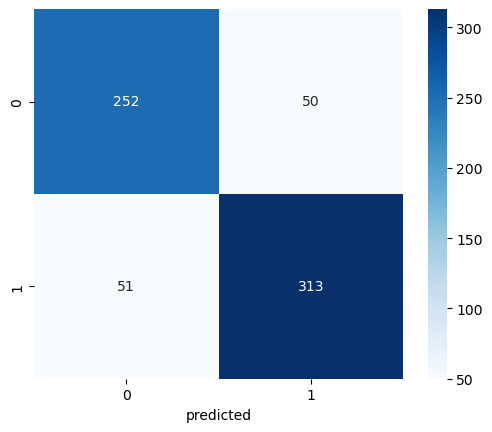

In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=74)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
confusion_plot()

In [140]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    gnb.fit(x_train,y_train)
    pred=gnb.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.7897897897897898 Random state:- 77


accuracy_score:- 0.7447447447447447
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       310
           1       0.77      0.75      0.76       356

    accuracy                           0.74       666
   macro avg       0.74      0.74      0.74       666
weighted avg       0.75      0.74      0.74       666



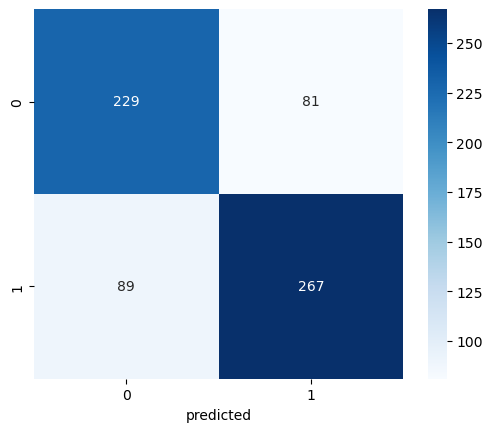

In [141]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=46)
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
confusion_plot()

In [142]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8303303303303303 Random state:- 98


accuracy_score:- 0.8078078078078078
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       274
           1       0.87      0.79      0.83       392

    accuracy                           0.81       666
   macro avg       0.80      0.81      0.80       666
weighted avg       0.82      0.81      0.81       666



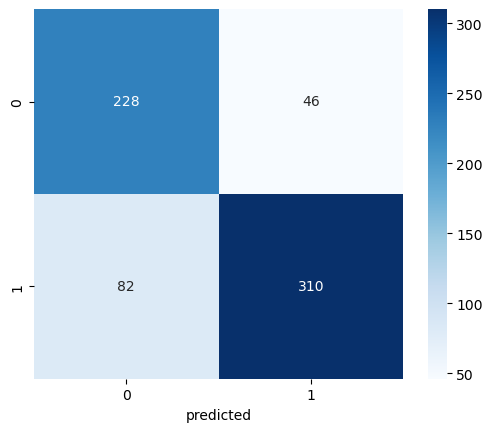

In [143]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=21)
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
confusion_plot()

In [144]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8798798798798799 Random state:- 41


accuracy_score:- 0.8483483483483484
              precision    recall  f1-score   support

           0       0.73      0.92      0.81       242
           1       0.94      0.81      0.87       424

    accuracy                           0.85       666
   macro avg       0.84      0.86      0.84       666
weighted avg       0.87      0.85      0.85       666



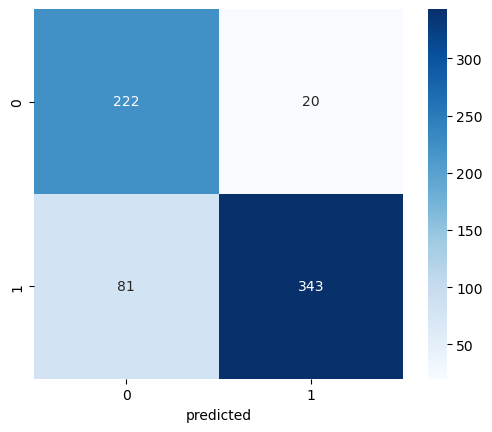

In [145]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=74)
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
confusion_plot()

In [146]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    svc.fit(x_train,y_train)
    pred=svc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.9129129129129129 Random state:- 32


accuracy_score:- 0.8708708708708709
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       305
           1       0.90      0.86      0.88       361

    accuracy                           0.87       666
   macro avg       0.87      0.87      0.87       666
weighted avg       0.87      0.87      0.87       666



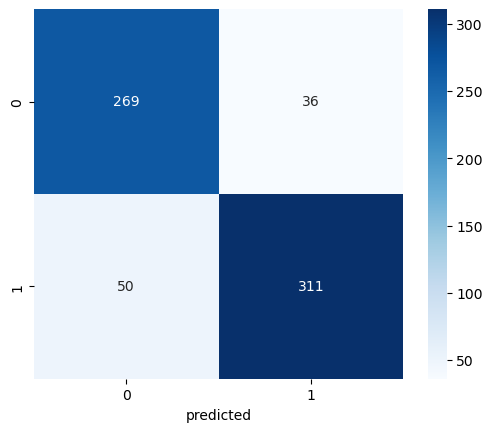

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=9)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
confusion_plot()

In [148]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.9324324324324325 Random state:- 99


accuracy_score:- 0.9159159159159159
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       305
           1       0.92      0.93      0.92       361

    accuracy                           0.92       666
   macro avg       0.92      0.92      0.92       666
weighted avg       0.92      0.92      0.92       666



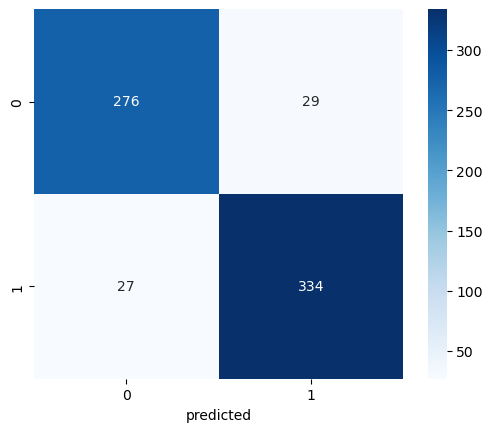

In [149]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=74)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
confusion_plot()

In [150]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    abc.fit(x_train,y_train)
    pred=abc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8888888888888888 Random state:- 58


accuracy_score:- 0.8678678678678678
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       287
           1       0.91      0.86      0.88       379

    accuracy                           0.87       666
   macro avg       0.86      0.87      0.87       666
weighted avg       0.87      0.87      0.87       666



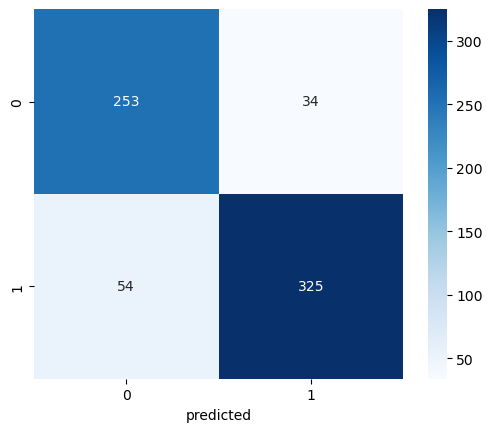

In [151]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=40)
abc.fit(x_train,y_train)
pred=abc.predict(x_test)
confusion_plot()

In [152]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    gbc.fit(x_train,y_train)
    pred=gbc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.9039039039039038 Random state:- 74


accuracy_score:- 0.8873873873873874
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       309
           1       0.88      0.91      0.90       357

    accuracy                           0.89       666
   macro avg       0.89      0.89      0.89       666
weighted avg       0.89      0.89      0.89       666



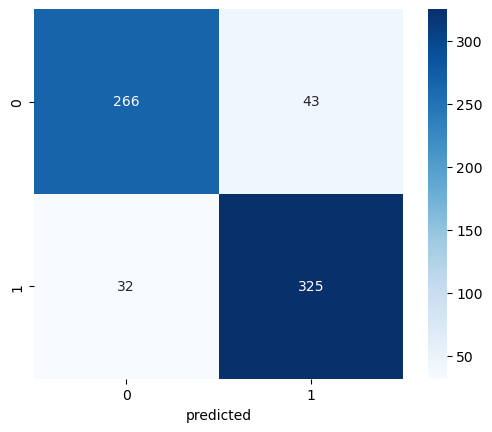

In [153]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=39)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
confusion_plot()

# Cross Validation 

In [154]:
for model in list_model:
    score=cross_val_score(model,x,y,cv=5)
    print(model)
    print(score)
    print(score.mean())

LogisticRegression()
[0.68018018 0.87162162 0.86004515 0.82167043 0.88036117]
0.8227757102474935
GaussianNB()
[0.66216216 0.79504505 0.76749436 0.73137698 0.78329571]
0.7478748500193195
DecisionTreeClassifier()
[0.6981982  0.82432432 0.82844244 0.83069977 0.82844244]
0.8020214345270779
KNeighborsClassifier()
[0.81981982 0.88063063 0.8510158  0.81941309 0.86907449]
0.847990767290993
SVC()
[0.69594595 0.92792793 0.91422122 0.87810384 0.91422122]
0.8660840298537815
RandomForestClassifier()
[0.73873874 0.95045045 0.93679458 0.91422122 0.93679458]
0.8953999145872735
AdaBoostClassifier()
[0.62162162 0.89189189 0.89390519 0.84424379 0.89164786]
0.8286620706485266
GradientBoostingClassifier()
[0.66666667 0.93693694 0.91647856 0.88487585 0.92776524]
0.8665446484859578


In [155]:
random_forest_params={'max_features': ['auto', 'sqrt', 'log2'],'criterion' :['gini', 'entropy']}

In [156]:
rfc_grid = GridSearchCV(rfc, random_forest_params, cv=5)
rfc_grid.fit(x_train,y_train)
print('Best score:', rfc_grid.best_score_)
print('Best score:', rfc_grid.best_params_)
print('Best score:', rfc_grid.best_estimator_)

Best score: 0.8904097085364591
Best score: {'criterion': 'gini', 'max_features': 'sqrt'}
Best score: RandomForestClassifier()


In [157]:
grid_pred=rfc_grid.predict(x_test)

In [158]:
def confusion_plot1():
    print('accuracy_score:-',accuracy_score(grid_pred,y_test))
    print(rfc_grid.best_estimator_)
    print(rfc_grid.best_params_)
    print('\nClassification Report')
    print(classification_report(grid_pred,y_test))
    matrix = confusion_matrix(grid_pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
    plt.xlabel("predicted")
    plt.show()

accuracy_score:- 0.8963963963963963
RandomForestClassifier()
{'criterion': 'gini', 'max_features': 'sqrt'}

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       317
           1       0.88      0.93      0.90       349

    accuracy                           0.90       666
   macro avg       0.90      0.89      0.90       666
weighted avg       0.90      0.90      0.90       666



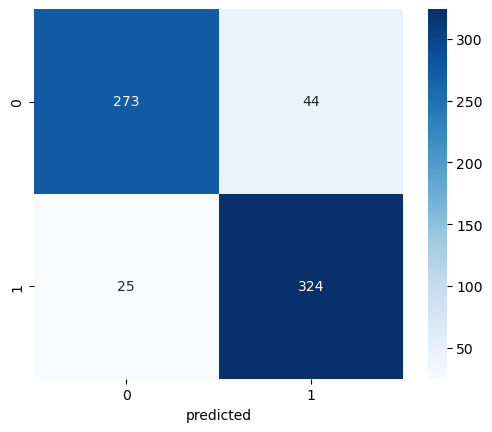

In [159]:
confusion_plot1()

# ROC Curve 

In [160]:
rfc_pred=rfc_grid.best_estimator_.predict_proba(x_test)

In [161]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
n_class=2

In [162]:
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, rfc_pred[:,i], pos_label=i)

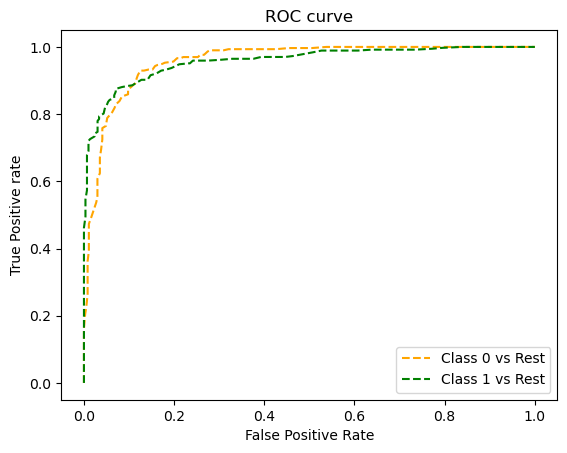

In [163]:
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC Curve',dpi=300); 

In [164]:
# Saving Model 
import joblib
joblib.dump(rfc_grid.best_estimator_,'HR_Analytics_Project.obj')

['HR_Analytics_Project.obj']